# Plotting Playground
This is a general purpose notebook for generation report ready plots

In [7]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt

In [8]:
PROJECT_PATH = pathlib.Path().cwd().parents[0]

## Normalized Structure Factor Radial Profile Log plot

In [189]:
def log_plot(ax: plt.Axes, x: np.ndarray, y: np.ndarray, label: str) -> plt.Axes:
    '''
    PLaceholder
    '''

    ax.plot(
        x,
        y, 
        "o",
        markersize=5,
        mfc="none",
        label= label
        )

    ax.set(
        xscale= "log",
        yscale= "log",
        xlabel= r"$k/K$",
        ylabel= r"$N(k)$",
        xlim= [1e-2,1],
        ylim= [1e-2,1]
        )

In [191]:
# Styling
from cycler import cycler

plt.style.use([
    PROJECT_PATH.joinpath('config/matplotlib/main.mplstyle'),
    PROJECT_PATH.joinpath('config/matplotlib/scatter.mplstyle')
])

plt.rc(
    'axes', 
    prop_cycle=(cycler(color=['r', 'g', 'b', 'y']) +
                  cycler(linestyle=['-', '--', ':', '-.']))
    )

### given ratio $|\nu_1/\nu_0|$ on different domains

In [210]:
RESULTS_PATH = PROJECT_PATH.joinpath("data/reference data/hyperuniformity_analysis/radial_profile_averages/")
RATIO = "ratio_5"
EXTREMA_TYPE = "all_extrema"  

In [211]:
results_info=[] # (collection points, path)
for results_folder in RESULTS_PATH.glob("*"+RATIO+"*"):
    N = results_folder.stem.split("_")[0]
    for results_path in results_folder.glob(EXTREMA_TYPE):
        results_info.append((N, results_path))

results_info.sort(reverse=True)

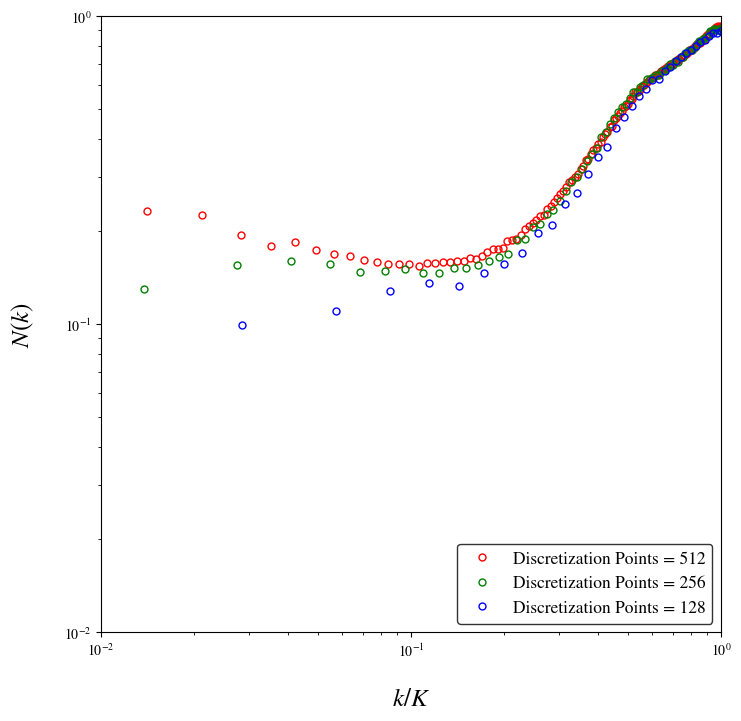

In [212]:

fig, ax = plt.subplots(figsize=(8,8), dpi=100)

for N, path in results_info:

    with open(path.joinpath(EXTREMA_TYPE+"_normalized_k_modes")) as x_txt_file:
        k_modes = np.loadtxt(x_txt_file)

    with open(path.joinpath(EXTREMA_TYPE+"_normalized_radial_profile_mean")) as y_txt_file:
        mean_radial_profile = np.loadtxt(y_txt_file)

    log_plot(
        ax= ax, 
        x= k_modes, 
        y= mean_radial_profile, 
        label= "Discretization Points = "+N
        )

ax.legend(loc="lower right")

### given domain $N$ with diffrent ratios $|\nu_1/\nu_0|$

In [213]:
RESULTS_PATH = PROJECT_PATH.joinpath("data/reference data/hyperuniformity_analysis/radial_profile_averages/")
DOMAIN_SIZE = "512"
EXTREMA_TYPE = "all_extrema"  

In [214]:
results_info=[] 
for results_folder in RESULTS_PATH.glob("*"+DOMAIN_SIZE+"*"):
    index = results_folder.stem.find("ratio_")
    ratio = results_folder.stem[index+6]
    for results_path in results_folder.glob(EXTREMA_TYPE):
        results_info.append((ratio, results_path))

results_info.sort(reverse=True)

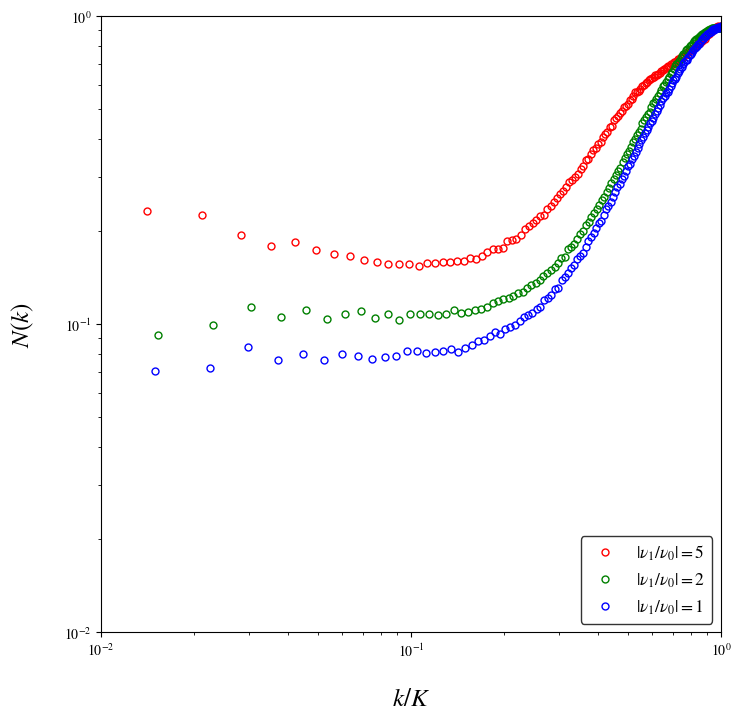

In [215]:

fig, ax = plt.subplots(figsize=(8,8), dpi=100)

for ratio, path in results_info:

    with open(path.joinpath(EXTREMA_TYPE+"_normalized_k_modes")) as x_txt_file:
        k_modes = np.loadtxt(x_txt_file)

    with open(path.joinpath(EXTREMA_TYPE+"_normalized_radial_profile_mean")) as y_txt_file:
        mean_radial_profile = np.loadtxt(y_txt_file)

    log_plot(
        ax= ax, 
        x= k_modes, 
        y= mean_radial_profile, 
        label= r"|$\nu_1/\nu_0| = $"+ratio
        )

ax.legend(loc="lower right")

## Extract Scaling

In [14]:
from active_flow.hyperuniformity_analysis.algorithm_tasks import _linear_curve_fitting

In [184]:
N = "512"
RATIO = "ratio_1"
EXTREMA_TYPE = "minima" 
fitting_range = [1e-2, 8e-1] 

In [185]:
for results_folder in RESULTS_PATH.glob("*"+N+"_"+RATIO+"*"):
    N = results_folder.stem.split("_")[0]
    for results_path in results_folder.glob(EXTREMA_TYPE):
        print(results_path)

/Users/abdelrahmanaltawil/Local Mac/GitHub/active-flow/data/reference data/hyperuniformity_analysis/radial_profile_averages/512_ratio_1_data/minima


In [186]:
with open(path.joinpath(EXTREMA_TYPE+"_normalized_k_modes")) as x_txt_file:
    k_modes = np.loadtxt(x_txt_file)

with open(path.joinpath(EXTREMA_TYPE+"_normalized_radial_profile_mean")) as y_txt_file:
    mean_radial_profile = np.loadtxt(y_txt_file)

index = np.where((k_modes >= fitting_range[0]) & (k_modes <= fitting_range[1]))

slop, y_intercept, _ = _linear_curve_fitting(
    x= np.log10(k_modes[index]),
    y= np.log10(mean_radial_profile[index])
)

Text(0, -15, '$N(k)_{k=0} =$ -6.15E-01')

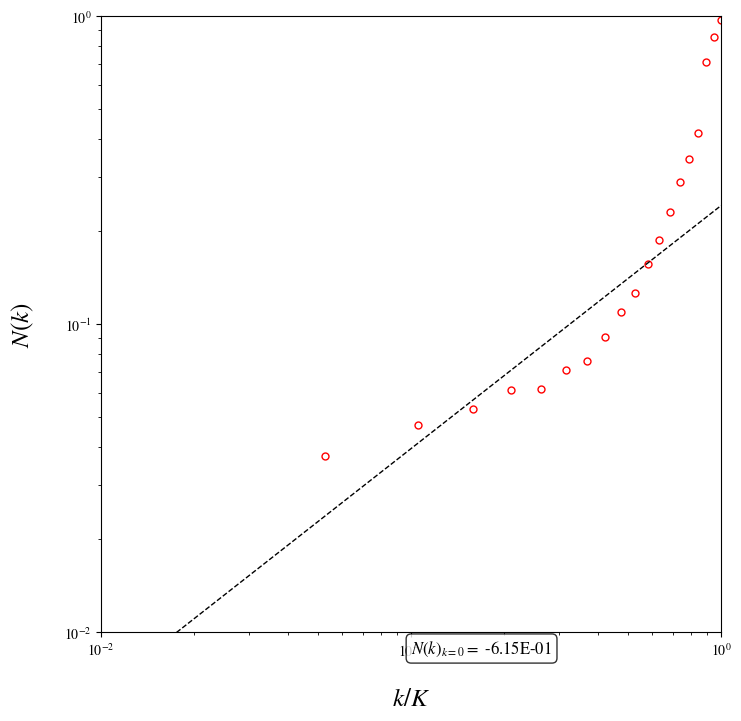

In [187]:
fig, ax = plt.subplots(figsize=(8,8), dpi=100)

log_plot(
    ax= ax, 
    x= k_modes, 
    y= mean_radial_profile, 
    label= "Discretization Points = "+N
    )

x = np.linspace(1e-2, 1e0, num=50)
ax.loglog(x, 10**y_intercept*x**slop, color='k', marker="")

ax.annotate(
    "$N(k)_{k=0} =$"+" {:.2E}".format(y_intercept),
    xy= (1e-1, 1e-2),
    xytext=(0, -15),
    textcoords='offset points',
    fontsize=12,
    bbox= {
    "boxstyle": "round",
    "facecolor": "white",
    "alpha": 0.8
    }
)


